In [1]:
from datasets.idda import IDDADataset
from client import Client
from server import Server
from utils.stream_metrics import StreamSegMetrics
from models.deeplabv3 import deeplabv3_mobilenetv2
import datasets.ss_transforms as sstr
from steps import Args
from steps import createServerStep3

In [2]:

arg=Args(25,8,lr={'type':'polynomial','from':0.1,'to':0.05,'steps':45,'exponent':0.9})
arg=Args(25,8,lr={'type':'cyclical','min':0.05,'max':0.1,'period':46})

modelStep1 = deeplabv3_mobilenetv2(16)
testTrStep1=sstr.Compose([sstr.ToTensor()])
trainTrStep1=sstr.Compose([sstr.ToTensor()])

In [3]:
server1=createServerStep3(args=arg,model=modelStep1,train_transform=trainTrStep1,test_transform=testTrStep1)

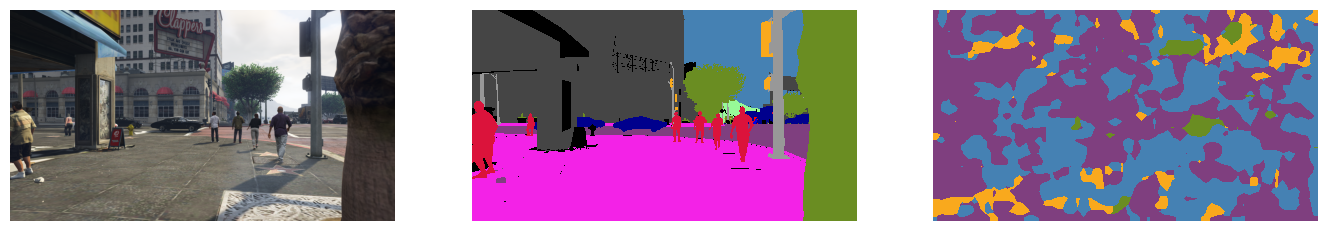

In [6]:
server1.showClientSample()

In [5]:
#server1.train()